# OPTIMAL TAX ON BUSINESS

## Load files and packages


In [31]:
using CSV, DataFrames, Statistics, Plots, PrettyTables
include("OCModelE.jl")
include("OCModelE_transition.jl")  # defines compute_FO_transition_path


compute_FO_transition_path (generic function with 2 methods)

## Read CSVs

In [ ]:

# Set path and load data
path = "/Users/bhandari/Dropbox/optimal_business_taxation/noncompliance/Approximation Code/"
cd(path)
df = CSV.read(path*"grid_results_with_values.csv", DataFrame)

# # run the part below if u want to have just ran a new set of cases
# files = filter(f -> occursin(r"^case_\d+\.\d+_\d+\.\d+\.csv$", f), readdir(path))

# # Read all matching files into a vector of DataFrames
# dfs = [CSV.read(joinpath(path, file), DataFrame) for file in files]

# # Optionally, combine into a single DataFrame (if same structure)
# df= vcat(dfs...)
# CSV.write("grid_results_with_values.csv", df)



"grid_results_with_values_lowchi.csv"

In [33]:
# df = filter(:value => x -> !isnan(x), df)

# df.ratioV=abs.(df.value./df.Vss .-1)
# # truncate on outliers
# mean(df.ratioV)

# sel= (df.ratioV .<.max(df.ratioV))
# df=df[sel, :]




## Plot optimal $\tau_{b}$

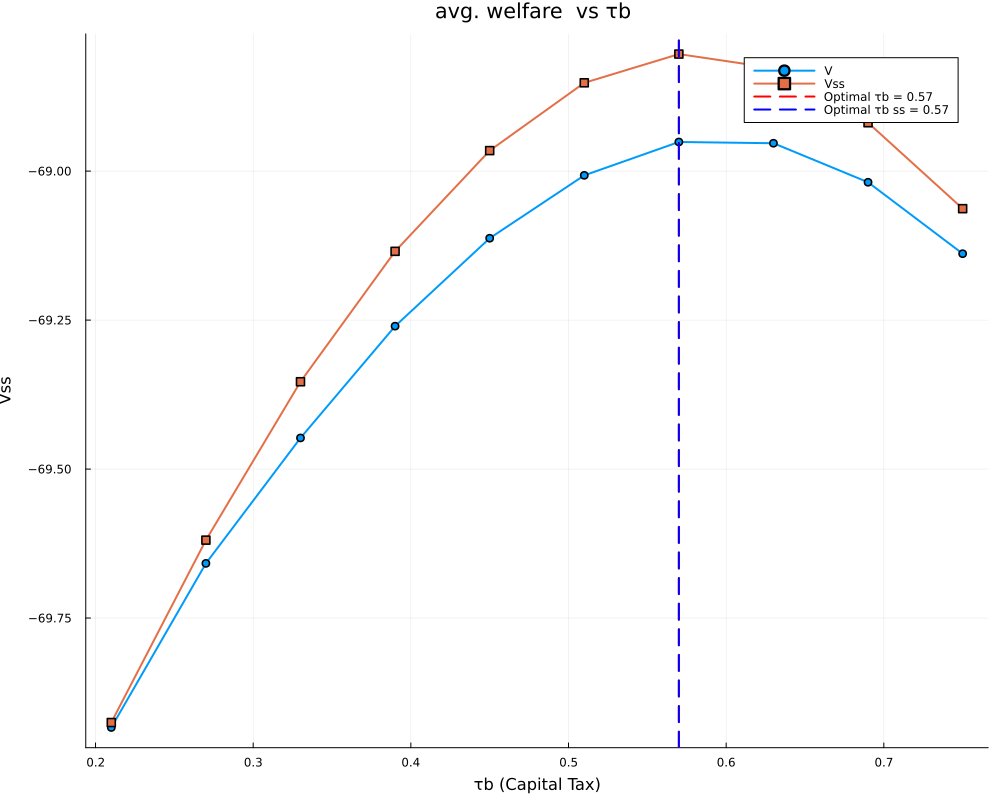

In [34]:

function plot_value_vs_taub(df)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]


    # Find τb with maximum value
    idx_max_ss = argmax(df_sub.Vss)
    best_taub_ss = df_sub[idx_max_ss, :τb]
    best_val_ss = df_sub[idx_max_ss, :Vss]


    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub.value,
         marker = :circle, label = "V",
         xlabel = "τb (Capital Tax)", ylabel = "V",
         title = "avg. welfare  vs τb ", grid = true)
        # Plot value vs τb and vertical line
        plot!(df_sub.τb, df_sub.Vss,
        marker = :square, label = "Vss",
        xlabel = "τb (Capital Tax)", ylabel = "Vss",
        title = "avg. welfare  vs τb ", grid = true)
    
    vline!([best_taub], linestyle = :dash, color = :red, label = "Optimal τb = $(round(best_taub, digits=2))")
    vline!([best_taub_ss], linestyle = :dash, color = :blue, label = "Optimal τb ss = $(round(best_taub_ss, digits=2))")

end

# Example usage
plot_value_vs_taub(df)


df_sub = filter(:value => x -> !isnan(x), df)


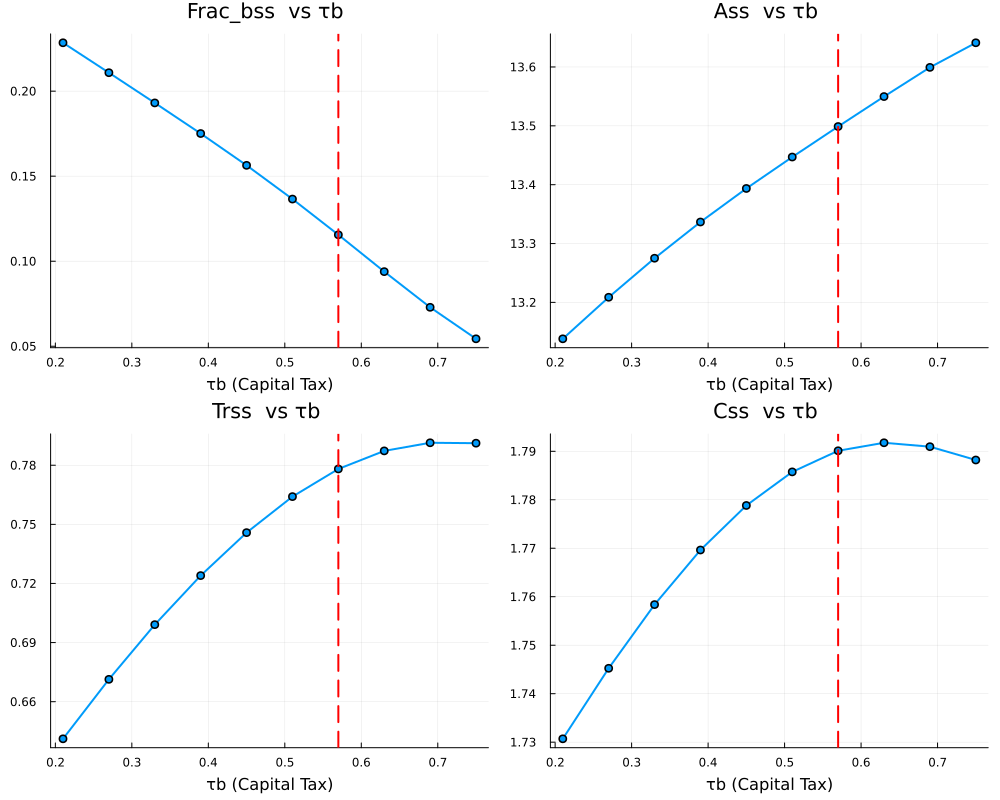

In [35]:

function plot_col_vs_taub(df,col)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]



    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub[!,col],
         marker = :circle, label=false,
         xlabel = "τb (Capital Tax)",
         title = "$(col)  vs τb ", grid = true)
    vline!([best_taub], linestyle = :dash, color = :red,label=false)

end

# Example usage
p1=plot_col_vs_taub(df,:Frac_bss)
p2=plot_col_vs_taub(df,:Ass)
p3=plot_col_vs_taub(df,:Trss)
p4=plot_col_vs_taub(df,:Css)
plot(p1,p2,p3,p4)


In [37]:
df_sub = filter(:value => x -> !isnan(x), df)
sort!(df_sub, :τb)
# Find τb with maximum value
idx_max = argmax(df_sub.value)
τb_val = df_sub[idx_max,:τb]
τw_val = df_sub[idx_max,:τw]
df,sol,OCM_,OCM = compute_FO_transition_path(τb_val, τw_val)


setting up the initial ss...
      Using bisection method
      Using newton method
      Interest rate       4.13, Govt transfer       0.64
      Asset market   1.017e-05, Govt budget   -2.863e-06

....done
                    OC Model Results

      Case Parameters
    -------------------------------------------
      τᵇ (Capital tax)           0.20
      τʷ (Labor tax)             0.40
      χ  (max leverage parameter)   1.50

      Equilibrium values and residuals
    -------------------------------------------
      Interest rate             4.13%
      Government transfer       0.64
      Asset market residual     1.02e-05
      Government budget        -2.86e-06


      Incomes (%GDP)            Products             
    -------------------------------------------------
      Sweat            11.5  |  Consumption      67.4
      Compensation     44.8  |  Investment       26.7
      Capital income   43.7  |  Defense           5.8
    ----------------------------------------------

(301×8 DataFrame
 Row │ R        W        Tr        Frac_b    V         A        C        t     ⋯
     │ Float64  Float64  Float64   Float64   Float64   Float64  Float64  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.04131  1.16065  0.635944  0.231335  -69.9795  13.1261  1.72817      0 ⋯
   2 │ 1.04351  1.12365  0.761509  0.122482  -68.9506  13.1439  1.75471      1
   3 │ 1.04342  1.12515  0.762584  0.12208   -68.9413  13.1606  1.75646      2
   4 │ 1.04335  1.12636  0.763501  0.121773  -68.9325  13.1765  1.75812      3
   5 │ 1.04329  1.12739  0.764312  0.121519  -68.9242  13.1915  1.7597       4 ⋯
   6 │ 1.04323  1.1283   0.765048  0.121298  -68.9163  13.2058  1.76121      5
   7 │ 1.04318  1.12913  0.765725  0.121099  -68.9089  13.2193  1.76263      6
   8 │ 1.04314  1.12989  0.766355  0.120918  -68.9019  13.2322  1.76398      7
  ⋮  │    ⋮        ⋮        ⋮         ⋮         ⋮         ⋮        ⋮       ⋮   ⋱
 295 │ 1.04229  1.1441 

In [39]:


# Set defaults
default(linewidth = 2, size = (1000, 800), legend = :topright)

# Individual plots
p1 = plot(df_trans.t, df_trans.A,       ylabel = "Capital (A)",            xlabel = "Time", label = "")
p2 = plot(df_trans.t, df_trans.Frac_b,  ylabel = "Fraction Self-Employed", xlabel = "Time", label = "")
p3 = plot(df_trans.t, df_trans.W,       ylabel = "Wage (W)",                xlabel = "Time", label = "")
p4 = plot(df_trans.t, df_trans.C,       ylabel = "Consumption (C)",         xlabel = "Time", label = "")
p5 = plot(df_trans.t, df_trans.R,       ylabel = "Interest Rate (R)",       xlabel = "Time", label = "")
p6 = plot(df_trans.t, df_trans.Tr,      ylabel = "Transfers (Tr)",          xlabel = "Time", label = "")

# Combine into 3×2 layout without subplot titles
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2))


UndefVarError: UndefVarError: `df_trans` not defined in `Main`
Suggestion: check for spelling errors or missing imports.